# REAL - TIME TWEET SENTIMENT ANALYSIS



> **AUTHOR**: Ritika Gupta

This notebook demonstrates real time analysis of tweets sentiment using various NLP Sentiment Models . It is important for businesses to know and track consumer sentiment regarding their products in real-time so that they can enable better consumer experience and product enhancements. 

**APPROACH** 
1. Extract Tweets from Twitter API using Tweepy Library and Twitter Dev Access Keys . 
2.  Preprocess Extracted Tweets
3. Score Sentiment Using Text Blob Library
4. Score Sentiment Using Hugging Face Transformer Model
5. Visualise the tweets and Sentiment scores (Seaborn)
6. Plotly Visualisation
7. Conclusion



## Install Libraries

In [1]:
!pip install tweepy

In [26]:
#Load Packages

import tweepy
import pandas as pd
import json
import numpy as np

#--------Visualization
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set(rc={'figure.figsize':(15,5)})


In [5]:
print(tweepy.__version__)

3.10.0


## 1. Get Auth Access



> TWEEPY Documentation for list of methods - https://docs.tweepy.org/en/stable/api.html

> Twitter Search API parameters : https://developer.twitter.com/en/docs/twitter-api/v1/tweets/search/api-reference/get-search-tweets

Paste your corresponding keys and ,token and secret from your twitter dev account.




In [6]:
consumer_key =  "PASTE YOUR API KEY"  #API KEY
consumer_secret = "KEY SECRET"  #API KEY SECRET
access_token = "TOKEN"
access_token_secret = "ACCESS TOKEN"

# Now we use above credentials to authenticate the API OAuth
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

## 2. Fetch Tweets



> NOTE : Twiiter free API used here allows tweets from last 7 days . To fetch older tweets one needs premium twitter API such as academic or 30 days API . 

https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api



In [7]:
# A data frame to store tweets in proper format one can add/remove columns as desired
df = pd.DataFrame(columns=["Date","TwitterHandle","IsVerified","Tweet","Likes","RT",'User_location',"Followers_Count","User_mentions","Hashtags"])
# Write a Function to extract tweets:
def get_tweets(Topic,Count,**kwargs) :
    i=0
    for tweet in tweepy.Cursor(api.search,q=Topic,count=Count, lang="en",exclude='retweets',include_entities=True,**kwargs).items():
      df.loc[i,"Date"] = tweet.created_at
      df.loc[i,"TwitterHandle"] = tweet.user.screen_name
      df.loc[i,"IsVerified"] = tweet.user.verified
      df.loc[i,"Tweet"] = tweet.text
      df.loc[i,"Likes"] = tweet.favorite_count
      df.loc[i,"RT"] = tweet.retweet_count
      df.loc[i,"User_location"] = tweet.user.location
      df.loc[i,"Followers_Count"] = tweet.user.followers_count
      #df.loc[i,"IsSensitive"] = tweet.user.
      hashtag = []
      user_mention = []
      for item in tweet.entities['hashtags'] : 
        hashtag.append(item['text'])
      for item in tweet.entities['user_mentions'] : 
        user_mention.append(item['screen_name'])
      df.loc[i,"User_mentions"] = user_mention
      df.loc[i,"Hashtags"] = hashtag
      i=i+1
      if i>=Count:
          df.to_pickle("TweetDataset")        #Storing df in pickled form to avoid conversion of lists in to strings
          df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
          break
      else:
          pass

In [12]:
#Call get_tweets function 
get_tweets("#RussiaUkraineWar",800)

In [15]:
df.head()

,Date,TwitterHandle,IsVerified,Tweet,Likes,RT,User_location,Followers_Count,User_mentions,Hashtags,clean_tweet,Sentiment
0,2022-03-25 11:18:00,AmazingUA,False,The moment yesterday when a rocket hit a crowd...,0,0,Україна,1079,[],[],the moment yesterday when a rocket hit a crowd...,Neutral
1,2022-03-25 11:16:06,hapSTR7,False,Google Street View in LIVE \nWatch more live o...,0,0,,33,[],"[hapstr, Syria]",google street view in live watch more live on ...,Negative
2,2022-03-25 11:15:55,CNBCTV18News,True,COMING UP @ 5 PM | As the #RussiaUkraineWar ra...,3,0,,1030448,[],"[RussiaUkraineWar, WangYi]",coming up 5 pm as the russiaukrainewar rages o...,Positive
3,2022-03-25 11:15:28,FEMarkets,False,Where is Indian rupee headed to in coming days...,2,1,India,2650,[],[],where is indian rupee headed to in coming days...,Negative
4,2022-03-25 11:15:00,WIONews,True,4 new battlegroups announced\n\n+ Ukrainian Pr...,2,0,India,431004,[],[],4 new battlegroups announced ukrainian preside...,Positive


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             800 non-null    object
 1   TwitterHandle    800 non-null    object
 2   IsVerified       800 non-null    object
 3   Tweet            800 non-null    object
 4   Likes            800 non-null    object
 5   RT               800 non-null    object
 6   User_location    800 non-null    object
 7   Followers_Count  800 non-null    object
 8   User_mentions    800 non-null    object
 9   Hashtags         800 non-null    object
dtypes: object(10)
memory usage: 101.0+ KB


In [ ]:
hastaglist=[]
for val  in df.Hashtags.dropna().values:
  hastaglist.extend(val)
  
print(hastaglist)

['RussiaUkraineWar', 'RussiaUkraineCrisis', 'VolodymyrZelenskyy', 'Moscow', 'Ukraine', 'Putin', 'theeconomist', 'russiaukrainewar', 'RussiaUkraineWar', 'WebQoof', 'FactCheck', 'Russia', 'RussiaUkraineWar', 'Ukraine', 'Sergeisukharev', 'RussiaInvadedUkraine', 'CanadaUNMission', 'Canada', 'UnitedNations', 'UN', 'Russia', 'CanadaUNMissionTweetRussiaLetter', 'Bottomline', 'RussiaUkraineWar', 'RussiaUkraineWar', 'VladimirPutin', 'Russia', 'UkraineRussiaWar', 'RussiaUkraineWar', 'RussiaUkraineConflict', 'RussiaUkraineCrisis', 'UkraineUnderAttaсk', 'RussiaUkraineWar', 'Supermarket', 'Kyiv', 'Russia', 'Ukraine', 'Russia', 'Ukraine', 'RussianArmy', 'Moscow', 'RussianArmy', 'RussiaUkraineWar', 'Ukraine', 'RussiaUkraineWar', 'RussianArmy', 'RussiaUkraineWar', 'Ukraine', 'VolodymyrZelensky', 'Moscow', 'RussiaUkraineWar', 'VolodymyrZelensky', 'Russia', 'DNR', 'Mariupol', 'Ukraine', 'Russia', 'Kyiv', 'Odessa', 'Kharkiv', 'RussiaUkraineWar', 'PutinWarCriminal', 'Russia', 'UkraineRussiaWar', 'RussiaUk

In [ ]:
(df.Hashtags.dropna())

0                [RussiaUkraineWar, RussiaUkraineCrisis]
1                                                     []
2                                                     []
3                                                     []
4                                                     []
                             ...                        
795                                                   []
796                                              [Putin]
797    [Ukraine, UkraineRussiaWar, Russia, Russian, U...
798    [Chernihiv, Ukraine️, RussiaUkraineWar, Ukrain...
799                           [cryptocurrencies, crypto]
Name: Hashtags, Length: 800, dtype: object

In [ ]:
(df.Hashtags)

0                [RussiaUkraineWar, RussiaUkraineCrisis]
1                                                     []
2                                                     []
3                                                     []
4                                                     []
                             ...                        
795                                                   []
796                                              [Putin]
797    [Ukraine, UkraineRussiaWar, Russia, Russian, U...
798    [Chernihiv, Ukraine️, RussiaUkraineWar, Ukrain...
799                           [cryptocurrencies, crypto]
Name: Hashtags, Length: 800, dtype: object

## 3. Preprocess Tweets

Here we remove hyperlinks , twitter handles ,emoji and special characters from tweets.


In [12]:
df.Tweet[10]

'9 European, US fossil fuel companies paid total $15.8B taxes, fees to #Russia since 2014 invasion of #Ukraine… https://t.co/3CCfUyLZhB'

In [8]:
# A function t clean tweets
import re
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z\s])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# (@[A-Za-z0-9]+) : Removes twitter handles @Nasa @Twiiter etc.
# ([^0-9A-Za-z\s]) : Removes anything except text,number and space
# (\w+:\/\/\S+)  :  Removes https:// links  S+ means a string of non-whitespace charcters
# [RT] : removes Retweet symbol

In [13]:
# Call function to get Clean tweets

df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))
df.head(5)

,Date,TwitterHandle,IsVerified,Tweet,Likes,RT,User_location,Followers_Count,User_mentions,Hashtags,clean_tweet,Sentiment
0,2022-03-25 11:18:00,AmazingUA,False,The moment yesterday when a rocket hit a crowd...,0,0,Україна,1079,[],[],the moment yesterday when a rocket hit a crowd...,NaN
1,2022-03-25 11:16:06,hapSTR7,False,Google Street View in LIVE \nWatch more live o...,0,0,,33,[],"[hapstr, Syria]",google street view in live watch more live on ...,NaN
2,2022-03-25 11:15:55,CNBCTV18News,True,COMING UP @ 5 PM | As the #RussiaUkraineWar ra...,3,0,,1030448,[],"[RussiaUkraineWar, WangYi]",coming up 5 pm as the russiaukrainewar rages o...,NaN
3,2022-03-25 11:15:28,FEMarkets,False,Where is Indian rupee headed to in coming days...,2,1,India,2650,[],[],where is indian rupee headed to in coming days...,NaN
4,2022-03-25 11:15:00,WIONews,True,4 new battlegroups announced\n\n+ Ukrainian Pr...,2,0,India,431004,[],[],4 new battlegroups announced ukrainian preside...,NaN


## 4. Sentiment Score : TextBlob

In [10]:
# Funciton to analyze Sentiment Using TextBlob

from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [14]:
# Call function to get the Sentiments

df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(5)

,Date,TwitterHandle,IsVerified,Tweet,Likes,RT,User_location,Followers_Count,User_mentions,Hashtags,clean_tweet,Sentiment
0,2022-03-25 11:18:00,AmazingUA,False,The moment yesterday when a rocket hit a crowd...,0,0,Україна,1079,[],[],the moment yesterday when a rocket hit a crowd...,Neutral
1,2022-03-25 11:16:06,hapSTR7,False,Google Street View in LIVE \nWatch more live o...,0,0,,33,[],"[hapstr, Syria]",google street view in live watch more live on ...,Negative
2,2022-03-25 11:15:55,CNBCTV18News,True,COMING UP @ 5 PM | As the #RussiaUkraineWar ra...,3,0,,1030448,[],"[RussiaUkraineWar, WangYi]",coming up 5 pm as the russiaukrainewar rages o...,Positive
3,2022-03-25 11:15:28,FEMarkets,False,Where is Indian rupee headed to in coming days...,2,1,India,2650,[],[],where is indian rupee headed to in coming days...,Negative
4,2022-03-25 11:15:00,WIONews,True,4 new battlegroups announced\n\n+ Ukrainian Pr...,2,0,India,431004,[],[],4 new battlegroups announced ukrainian preside...,Positive


In [17]:
# Check Summary of Random Record
n = 34
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment'][n])

Original tweet:
 Tell me again how forced-pregnancy activists are really the ones pro women's rights by egging the government on to… https://t.co/tK6QOsrQxf

Clean tweet:
 tell me again how forced pregnancy activists are really the ones pro women s rights by egging the government on to

Sentiment of the tweet:
 Positive


## Using Huggingface Transformers

We will now use tranformer based sentiment classifier since they give superior results as compared to TextBlob as they are able to capture the sequential and contextual information.

I used the **bertweet** transformer which has been trained and fine-tuned for tweet sentiment analysis.

[BERTWEET](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis)

* We can directly use the tranformers pipeline mechanism to pass our data and analyse the tweet scores
* The model is of 500 MB size relatively smaller than distillbert models

In [ ]:
!pip install transformers
!pip install emoji

In [17]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
#Instantiate tokenizer
tokenizer = AutoTokenizer.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis") #paste the model path from hugging face repo
#Instantiate the Classifier
model = AutoModelForSequenceClassification.from_pretrained("finiteautomata/bertweet-base-sentiment-analysis")

classifier = pipeline("sentiment-analysis" , model=model, tokenizer=tokenizer)

* It takes more time as compared to text blob to classify sentiment of each tweet .

In [18]:
scores = df.Tweet.apply(lambda x: classifier(x)) #3 min to classify 800 tweets


In [19]:
# Store in data frame scores and labels
df['Sentiment_Transformer'] = [score[0]['label'] for score in scores]

In [20]:
df['Sentiment_Confidence'] = [score[0]['score'] for score in scores]

In [23]:
classifier(df.clean_tweet[211]) #sample output of classifier 

[{'label': 'NEG', 'score': 0.92368483543396}]

In [21]:
# Check Summary of Random Record
n = 300
print("Original tweet:\n",df['Tweet'][n])
print()
print("Clean tweet:\n",df['clean_tweet'][n])
print()
print("Sentiment of the tweet:\n",df['Sentiment_Transformer'][n])

Original tweet:
 The War: It has been month since Russian began its full-scale invasion of Ukraine
•
🤍🇺🇦🤍
Ukraine
•
#StopRussia
#war… https://t.co/Ib4tWlrDII

Clean tweet:
 the war it has been month since russian began its full scale invasion of ukraine ukraine stoprussia war

Sentiment of the tweet:
 NEG


# 5. Visualization of Tweets

* As we can see the below visualization that textblob predicts higher number of positive tweets and lower number of negative tweets as compared to transformer model.

* We also plot the confidence score distribution of predicted sentiments from transformer model. We observe that majority of tweets are predicted with high confidence. And there is very less number of positive tweets

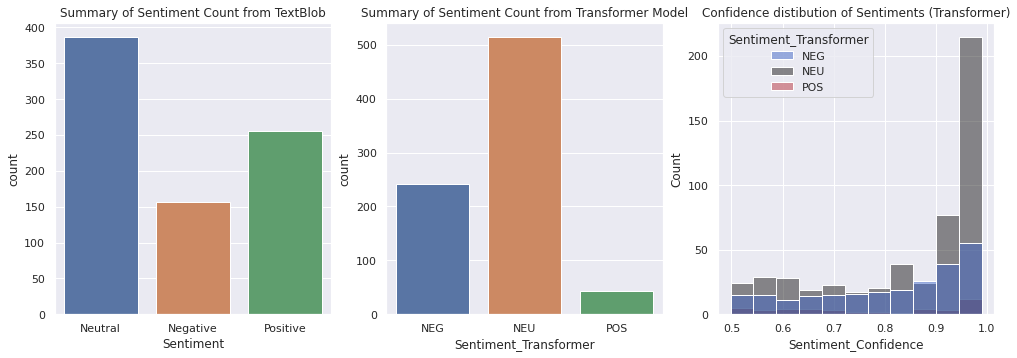

In [27]:
fig,ax=plt.subplots(1,3)
sns.countplot(data=df , x="Sentiment",ax=ax[0]).set(title='Summary of Sentiment Count from TextBlob')
sns.countplot(data=df , x="Sentiment_Transformer",ax=ax[1]).set(title='Summary of Sentiment Count from Transformer Model')
sns.histplot(data=df , x="Sentiment_Confidence",hue="Sentiment_Transformer",ax=ax[2],palette="icefire").set(title="Confidence distibution of Sentiments (Transformer)")
plt.show()

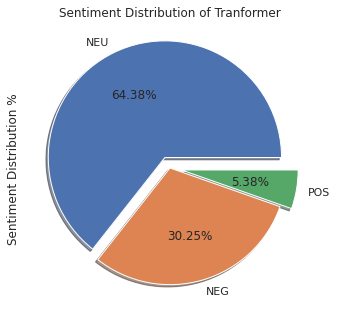

In [28]:
#Pieplot
df.Sentiment_Transformer.value_counts().plot.pie(shadow=True,explode=(0.1, 0.0, 0.1),autopct='%1.2f%%',ylabel="Sentiment Distribution %",title="Sentiment Distribution of Tranformer")

# Plotly Visualization

We will now attempt to build interactive visualisation using the plotly library which will give more insight to the end user of this sentiment analysis model.

* Note we will plot the sentiments from transformer model only.

In [ ]:
!pip install pyyaml==5.4.1 #fix to avoid plotly import error in colab TypeError: load() missing 1 required positional argument: 'Loader'

In [29]:
!pip install plotly

In [4]:
import plotly
from plotly import express as px
import plotly.offline
import plotly.graph_objects as go
%matplotlib inline
import plotly.io as pio 
pio.renderers.default = "colab"

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [49]:
df.head()

,Date,TwitterHandle,IsVerified,Tweet,Likes,RT,User_location,Followers_Count,User_mentions,Hashtags,clean_tweet,Sentiment,Sentiment_Transformer,Sentiment_Confidence
0,2022-03-25 11:18:00,AmazingUA,False,The moment yesterday when a rocket hit a crowd...,0,0,Україна,1079,[],[],the moment yesterday when a rocket hit a crowd...,Neutral,NEG,0.860101
1,2022-03-25 11:16:06,hapSTR7,False,Google Street View in LIVE \nWatch more live o...,0,0,,33,[],"[hapstr, Syria]",google street view in live watch more live on ...,Negative,NEU,0.878127
2,2022-03-25 11:15:55,CNBCTV18News,True,COMING UP @ 5 PM | As the #RussiaUkraineWar ra...,3,0,,1030448,[],"[RussiaUkraineWar, WangYi]",coming up 5 pm as the russiaukrainewar rages o...,Positive,NEU,0.980428
3,2022-03-25 11:15:28,FEMarkets,False,Where is Indian rupee headed to in coming days...,2,1,India,2650,[],[],where is indian rupee headed to in coming days...,Negative,NEU,0.908622
4,2022-03-25 11:15:00,WIONews,True,4 new battlegroups announced\n\n+ Ukrainian Pr...,2,0,India,431004,[],[],4 new battlegroups announced ukrainian preside...,Positive,NEU,0.952022


## PIE PLOT

In [29]:
countsum=df['Sentiment_Transformer'].value_counts()
countsum.label = "Sentiment"
#countsum.index = "Sentiment"

In [30]:
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen'] #define color scheme one can modify as per their req
fig = px.pie(countsum, values="Sentiment_Transformer", names=countsum.index, title="Distribution of Sentiment across Tweets")
fig.update_traces(textfont_size=20,
                      marker=dict(colors=colors, line=dict(color='#fafafa', width=3)))
    
fig.show()

## Histogram Plot of Confidence Score

In [33]:
fig = px.histogram(df, x="Sentiment_Confidence", color="Sentiment_Transformer",
                       title="Distribution of Sentiment Confidence across Tweets", color_discrete_sequence=colors,
                       labels={'Sentiment_Confidence':'Sentiment Confidence'}) # can specify one label per df column
fig.update_traces(textfont_size=20,marker=dict(line=dict(color='#fafafa', width=1)))
fig.show()

In [ ]:
# colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
# fig = px.histogram(df, x="Likes",facet_col="Sentiment_Transformer",title="Distribution of Sentiment across Tweets")
# fig.update_traces(textfont_size=20,
#                       marker=dict(color=colors, line=dict(color='#fafafa', width=3)))
    
# fig.show()

## Violin Plots of Likes , Retweets 

We can analyse which tweets fetched most likes and retweets and their corresponding sentiment.

In [35]:
fig=px.violin(df, y="Likes", box=True, points="outliers",
          hover_data=['Likes','TwitterHandle','Sentiment_Transformer','Tweet'])
# fig.add_trace(go.Violin(df,x="RT",
#                         legendgroup='M', scalegroup='M', name='M',
#                         line_color='red'))
fig.add_trace(go.Violin(y=df['RT'],
                        legendgroup='Retweets', scalegroup='Retweets', name='Retweets',points="outliers",
                        line_color='blue'))#hover=['Likes','TwitterHandle','Sentiment_Transformer','Tweet']))
#fig.update_layout(hover_data = ['Likes','TwitterHandle','Sentiment_Transformer','Tweet'])

## Top Twitter Handles,Likes,Followers

* We can check top twitter handles based on number of tweets . 
* We can see top follower counts and likes.

In [37]:
df['TwitterHandle'].value_counts().nlargest(5)

An3Anwar         31
hizbie_          14
Gugugugagaga3    14
PXP_IS_SCAM      11
THIS_IS_UKR      11
Name: TwitterHandle, dtype: int64

In [38]:
df['Likes'].value_counts().nlargest(5)

0    377
1    207
2     74
3     43
4     15
Name: Likes, dtype: int64

In [40]:
df['Followers_Count'].value_counts().nlargest(5) # 31 twitter user has 85 followers

85      31
363     20
196     15
1196    11
1110    11
Name: Followers_Count, dtype: int64

## Histogram to show timeseries distribution of sentiments

* We can plot histograms based on date field to see how the sentiment of tweets vary wrt to time and date of tweet

In [41]:
fig=px.histogram(df[['Date','Sentiment_Transformer']],x="Date",color='Sentiment_Transformer',barmode="overlay")
fig.show()

## Distribution of Sentiment : HAshtags, USer_Mentions

In [42]:
hastags_df = df[['Hashtags','Sentiment_Transformer']].explode('Hashtags')

#hastags_df.reset_index(level=['Hashtags','Sentiment_Transformer'] , inplace=True)
final = hastags_df[hastags_df['Hashtags'].isin(hastags_df.Hashtags.value_counts().nlargest(5).index.to_list())]

In [43]:
hastags_df.Hashtags.value_counts().nlargest(5).index.to_list()

['RussiaUkraineWar', 'Ukraine', 'Russia', 'Russian', 'NATO']

In [46]:
fig=px.histogram(final,x="Hashtags",color='Sentiment_Transformer',barmode="overlay",color_discrete_sequence=colors)
fig.show()

In [50]:
#Similarly for User Mentions
user_df = df[['User_mentions','Sentiment_Transformer']].explode('User_mentions')

final2 = user_df[user_df['User_mentions'].isin(hastags_df.Hashtags.value_counts().nlargest(5).index.to_list())]

In [51]:
fig=px.histogram(final2,x="User_mentions",color='Sentiment_Transformer',barmode="overlay",color_discrete_sequence=colors)
fig.show()

## Conclusion

Thus we saw how we can use tweet sentiment analysis for deriving insight of user sentiment.The hashtag demosntrated here was #RussiaUkraineWar which we saw majority of tweets had  neutral sentiment followed by negative and very less tweets had positive sentiment.


Further Work can involve having aspect based sentiment analysis where various aspects of product and the corresponding sentiment of that aspect of product is gauged .
